In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib import rcParams
import warnings
# import mysql.connector
# from sqlalchemy import create_engine

# # Connect to MySQL
# db_config = {
#     'user': 'root',
#     'password': '',
#     'host': 'localhost',
#     'database': 'waterqi',
#     'raise_on_warnings': True
# }

# # Create a SQLAlchemy engine
# engine = create_engine(f"mysql+mysqlconnector://{db_config['user']}:{db_config['password']}@{db_config['host']}/{db_config['database']}")

# connection = mysql.connector.connect(**db_config)

# # Fetch data from MySQL
# query = "SELECT * FROM info;"
# # Check if the connection is open
# if connection.is_connected():
#     # Execute SQL query using pandas
#     data = pd.read_sql_query(query, connection)
# else:
#     print("MySQL Connection not open.")

In [2]:
warnings.filterwarnings(action='ignore')
warnings.warn('this is a warning!')

Reading the Dataset

In [3]:
#data = pd.read_sql_query(query, connection)
data = pd.read_csv(r'C:ackend\DataSet.csv',encoding='ISO-8859-1',low_memory=False)

Data Analysis

In [4]:
data.head()

,StationCode,Location,State,Temperature,DissolvedOxygen,PotentialOfHydrogen,Conductivity,BiochemicalOxygenDemand,NitratenanNitritenann,FecalColiform,TotalColiformsMean,Year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [5]:
data.describe()

,Year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   StationCode              1991 non-null   object
 1   Location                 1991 non-null   object
 2   State                    1991 non-null   object
 3   Temperature              1991 non-null   object
 4   DissolvedOxygen          1991 non-null   object
 5   PotentialOfHydrogen      1991 non-null   object
 6   Conductivity             1991 non-null   object
 7   BiochemicalOxygenDemand  1991 non-null   object
 8   NitratenanNitritenann    1991 non-null   object
 9   FecalColiform            1991 non-null   object
 10  TotalColiformsMean       1991 non-null   object
 11  Year                     1991 non-null   int64 
dtypes: int64(1), object(11)
memory usage: 186.8+ KB


In [7]:
data.shape

(1991, 12)

Handling Missing Values

In [8]:
#Checking for Missing Values
data.isnull().any()

StationCode                False
Location                   False
State                      False
Temperature                False
DissolvedOxygen            False
PotentialOfHydrogen        False
Conductivity               False
BiochemicalOxygenDemand    False
NitratenanNitritenann      False
FecalColiform              False
TotalColiformsMean         False
Year                       False
dtype: bool

In [9]:
data.isnull().sum()

StationCode                0
Location                   0
State                      0
Temperature                0
DissolvedOxygen            0
PotentialOfHydrogen        0
Conductivity               0
BiochemicalOxygenDemand    0
NitratenanNitritenann      0
FecalColiform              0
TotalColiformsMean         0
Year                       0
dtype: int64

In [10]:
data.dtypes

StationCode                object
Location                   object
State                      object
Temperature                object
DissolvedOxygen            object
PotentialOfHydrogen        object
Conductivity               object
BiochemicalOxygenDemand    object
NitratenanNitritenann      object
FecalColiform              object
TotalColiformsMean         object
Year                        int64
dtype: object

In [11]:
#Converting certain columns to numeric type
data['Temperature']=pd.to_numeric(data['Temperature'],errors='coerce')
data['DissolvedOxygen']=pd.to_numeric(data['DissolvedOxygen'],errors='coerce')
data['PotentialOfHydrogen']=pd.to_numeric(data['PotentialOfHydrogen'],errors='coerce')
data['BiochemicalOxygenDemand']=pd.to_numeric(data['BiochemicalOxygenDemand'],errors='coerce')
data['Conductivity']=pd.to_numeric(data['Conductivity'],errors='coerce')
data['NitratenanNitritenann']=pd.to_numeric(data['NitratenanNitritenann'],errors='coerce')
data['TotalColiformsMean']=pd.to_numeric(data['TotalColiformsMean'],errors='coerce')
data.dtypes

StationCode                 object
Location                    object
State                       object
Temperature                float64
DissolvedOxygen            float64
PotentialOfHydrogen        float64
Conductivity               float64
BiochemicalOxygenDemand    float64
NitratenanNitritenann      float64
FecalColiform               object
TotalColiformsMean         float64
Year                         int64
dtype: object

In [12]:
data.isnull().sum()

StationCode                  0
Location                     0
State                        0
Temperature                 92
DissolvedOxygen             31
PotentialOfHydrogen          8
Conductivity                25
BiochemicalOxygenDemand     43
NitratenanNitritenann      225
FecalColiform                0
TotalColiformsMean         132
Year                         0
dtype: int64

Filling Missing Values

In [13]:
data['Temperature'].fillna(data['Temperature'].mean(),inplace=True)
data['DissolvedOxygen'].fillna(data['DissolvedOxygen'].mean(),inplace=True)
data['PotentialOfHydrogen'].fillna(data['PotentialOfHydrogen'].mean(),inplace=True)
data['Conductivity'].fillna(data['Conductivity'].mean(),inplace=True)
data['BiochemicalOxygenDemand'].fillna(data['BiochemicalOxygenDemand'].mean(),inplace=True)
data['NitratenanNitritenann'].fillna(data['NitratenanNitritenann'].mean(),inplace=True)
data['TotalColiformsMean'].fillna(data['TotalColiformsMean'].mean(),inplace=True)

In [14]:
data.drop(["FecalColiform"],axis=1,inplace=True)

Re-Naming the Column Names

In [15]:
data=data.rename(columns = {'DissolvedOxygen': 'DO'})
data=data.rename(columns = {'Conductivity': 'CO'})
data=data.rename(columns = {'BiochemicalOxygenDemand': 'BOD'})
data=data.rename(columns = {'NitratenanNitritenann': 'NA'})
data=data.rename(columns = {'TotalColiformsMean': 'TCM'})
data=data.rename(columns = {'StationCode': 'SC'})
data=data.rename(columns = {'Location': 'LC'})
data=data.rename(columns = {'State': 'ST'})
data=data.rename(columns = {'PotentialOfHydrogen': 'PH'})

In [16]:
data

,SC,LC,ST,Temperature,DO,PH,CO,BOD,NA,TCM,Year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,2003


Calculating Water Quality Index(WQI) for each data point

1. Claculation of pH

In [17]:
data['NPH']=data.PH.apply(lambda x: (100 if(8.5>=x>=7)
                                else(80 if(8.6>=x>=8.5) or (6.9>=x>=6.8)
                                  else (60 if(8.8>=x>=8.6) or (6.8>=x>=6.7)
                                      else(40 if(9>=x>=8.8) or (6.7>=x>=6.5)
                                          else 0)))))

2. Calculation of dissolved oxygen

In [18]:
data['NDO']=data.DO.apply(lambda x: (100 if(x>=6)
                                else(80 if(6>=x>=5.1)
                                  else (60 if(5>=x>=4.1)
                                      else(40 if(4>=x>=3)
                                          else 0)))))

3. Calculation of Total Coliform

In [19]:

data['NTC']=data.TCM.apply(lambda x: (100 if(5>=x>=0)
                                else(80 if(50>=x>=5)
                                  else (60 if(500>=x>=50)
                                      else(40 if(10000>=x>=500)
                                          else 0)))))

4. Calculation of BiochemicalOxygenDemand

In [20]:
data['NBOD']=data.BOD.apply(lambda x:(100 if(3>=x>=0)
                                else(80 if(6>=x>=3)
                                  else (60 if(80>=x>=6)
                                      else(40 if(125>=x>=80)
                                          else 0)))))

5. Calculation of Conductivity

In [21]:
data['NCO']=data.CO.apply(lambda x:(100 if(75>=x>=0)
                                else(80 if(150>=x>=75)
                                  else (60 if(225>=x>=150)
                                      else(40 if(300>=x>=225)
                                          else 0)))))

6. Calculation of Nitrate

In [22]:
data['NNA']=data.NA.apply(lambda x:(100 if(20>=x>=0)
                                else(80 if(50>=x>=20)
                                  else (60 if(100>=x>=50)
                                      else(40 if(200>=x>=100)
                                          else 0)))))

Water Quality Index(WQI)

In [23]:
data['WPH']=data.NPH*0.165
data['WDO']=data.NDO*0.281
data['WBOD']=data.NBOD*0.234
data['WCO']=data.NCO*0.009
data['WNA']=data.NNA*0.028
data['WTC']=data.NTC*0.281
data['WQI']=data.WPH+data.WDO+data.WBOD+data.WCO+data.WNA+data.WTC
data

,SC,LC,ST,Temperature,DO,PH,CO,BOD,NA,TCM,...,NBOD,NCO,NNA,WPH,WDO,WBOD,WCO,WNA,WTC,WQI
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


Calculating WQI for each Year

In [24]:
average = data.groupby('Year')['WQI'].mean()
average.head()

Year
2003    66.239545
2004    61.290000
2005    73.762689
2006    72.909714
2007    74.233000
Name: WQI, dtype: float64

Data Visualization
- Univariate Analysis

In [25]:
data.describe()

,Temperature,DO,PH,CO,BOD,NA,TCM,Year,NPH,NDO,...,NBOD,NCO,NNA,WPH,WDO,WBOD,WCO,WNA,WTC,WQI
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1.991000e+03,1991.000000,1991.000000,1991.000000,...,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,26.209814,6.392637,112.090674,1786.466394,6.940049,1.623079,5.336872e+05,2010.038172,80.743345,90.105475,...,89.342039,49.281768,99.909593,13.322652,25.319638,20.906037,0.443536,2.797469,12.851763,75.641095
std,3.287652,1.322515,1875.150167,5517.289887,29.080653,3.852301,1.375409e+07,3.057333,33.792895,21.565348,...,17.557344,41.739037,1.846323,5.575828,6.059863,4.108419,0.375651,0.051697,6.943038,13.594726
min,10.000000,0.000000,0.000000,0.400000,0.100000,0.000000,0.000000e+00,2003.000000,0.000000,0.000000,...,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,1.120000,0.000000,19.300000
25%,25.000000,5.950000,6.900000,79.000000,1.200000,0.280000,1.180000e+02,2008.000000,80.000000,90.000000,...,80.000000,0.000000,100.000000,13.200000,25.290000,18.720000,0.000000,2.800000,11.240000,67.380000
50%,27.000000,6.700000,7.300000,187.630000,1.900000,0.620000,5.420000e+02,2011.000000,100.000000,100.000000,...,100.000000,60.000000,100.000000,16.500000,28.100000,23.400000,0.540000,2.800000,11.240000,78.740000
75%,28.300000,7.200000,7.700000,620.500000,3.900000,1.623079,2.929000e+03,2013.000000,100.000000,100.000000,...,100.000000,80.000000,100.000000,16.500000,28.100000,23.400000,0.720000,2.800000,16.860000,83.700000
max,35.000000,11.400000,67115.000000,65700.000000,534.500000,108.700000,5.110909e+08,2014.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,16.500000,28.100000,23.400000,0.900000,2.800000,28.100000,99.800000


1. displot

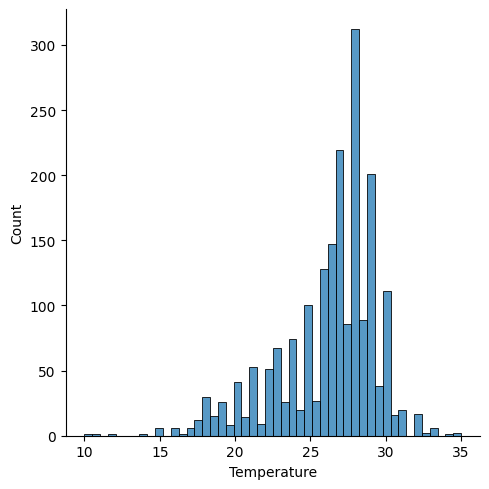

In [26]:
sns.displot(data.Temperature)
plt.show()

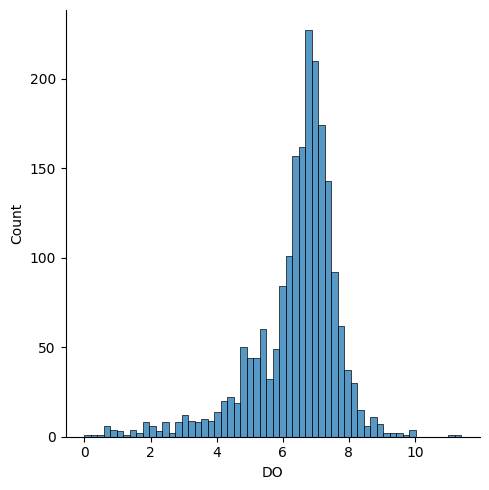

In [27]:
sns.displot(data.DO)
plt.show()

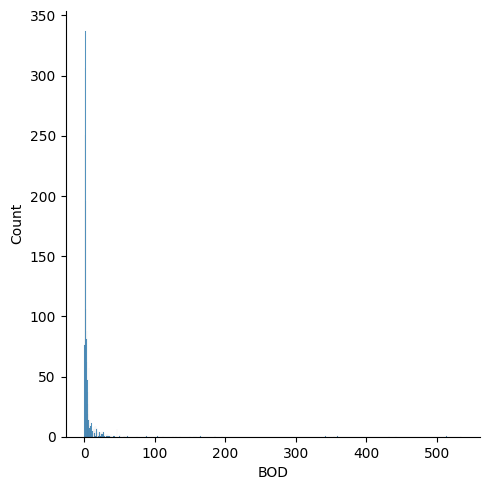

In [28]:
sns.displot(data.BOD)
plt.show()

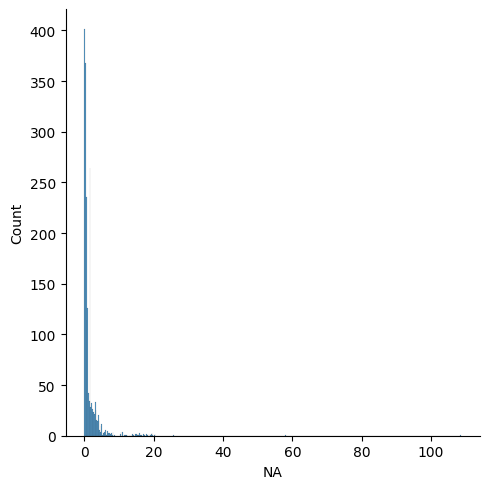

In [29]:
sns.displot(data.NA)
plt.show()

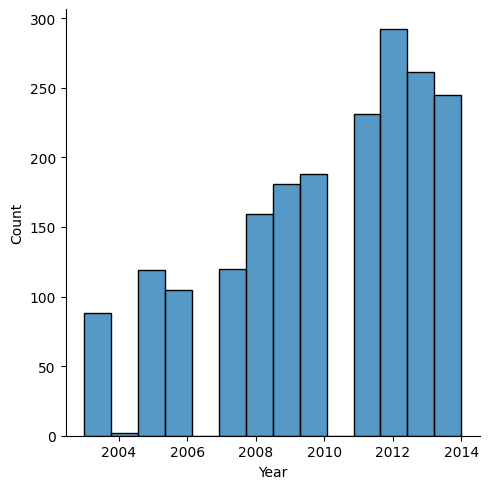

In [30]:
sns.displot(data.Year)
plt.show()

2. Countplot

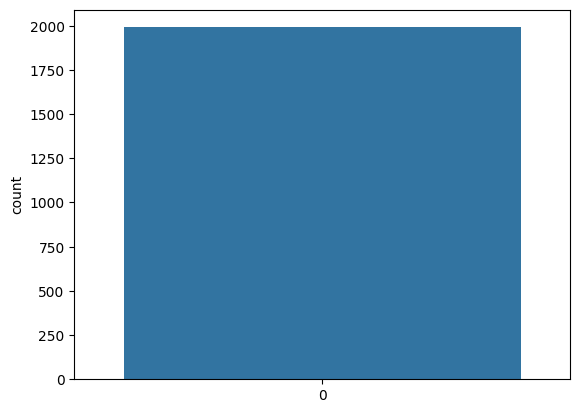

In [31]:
sns.countplot(data.PH)
plt.show()

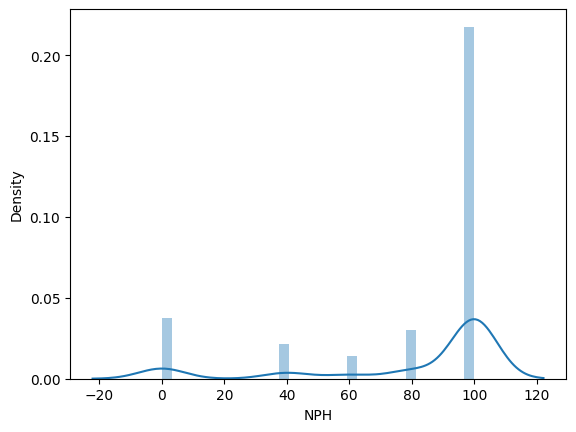

In [32]:
sns.distplot(data.NPH)
plt.show()

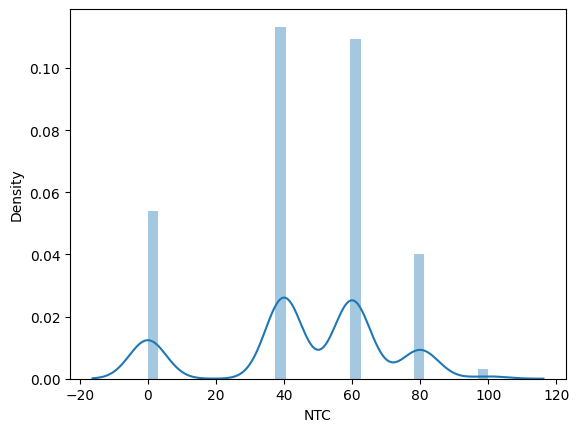

In [33]:
sns.distplot(data.NTC)
plt.show()

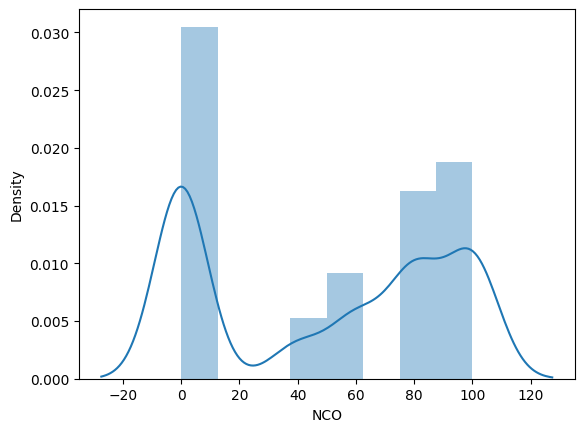

In [34]:
sns.distplot(data.NCO)
plt.show()

3. Pie Chart

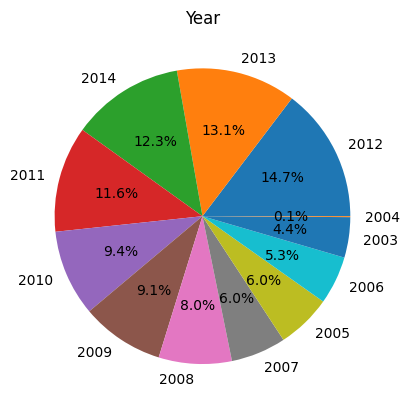

In [35]:
plt.pie(data['Year'].value_counts(), labels=data['Year'].value_counts().index, autopct='%1.1f%%')
plt.title('Year')
plt.show()

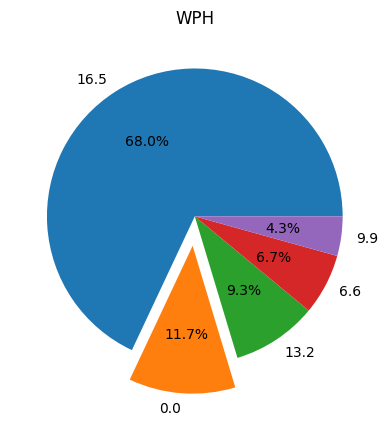

In [36]:
plt.pie(data.WPH.value_counts(),[0,0.2,0,0,0],labels=[16.5,0.0,13.2,6.6,9.9],autopct='%1.1f%%')
plt.title('WPH')
plt.show()

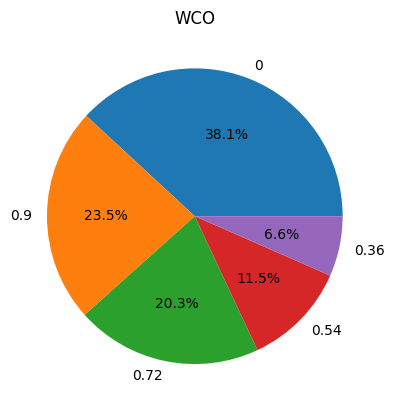

In [37]:
plt.pie(data.WCO.value_counts(),labels=[0,0.90,0.72,0.54,0.36],autopct='%1.1f%%')
plt.title('WCO')
plt.show()

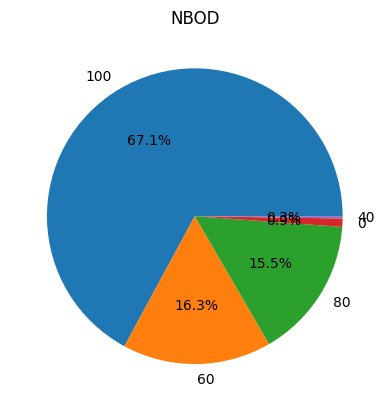

In [38]:
plt.pie(data.NBOD.value_counts(),labels=[100,60,80,0,40],autopct='%1.1f%%')
plt.title('NBOD')
plt.show()

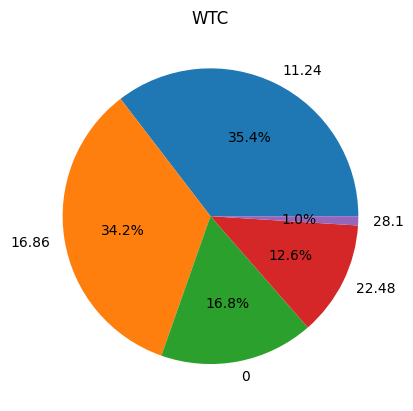

In [39]:
plt.pie(data.WTC.value_counts(),labels=[11.24,16.86,0,22.48,28.10],autopct='%1.1f%%')
plt.title('WTC')
plt.show()

Bivariate analysis

1. Line plot

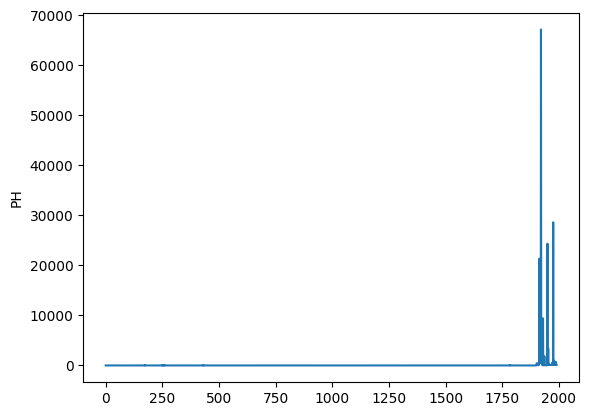

In [40]:
sns.lineplot(data.PH)
plt.show()

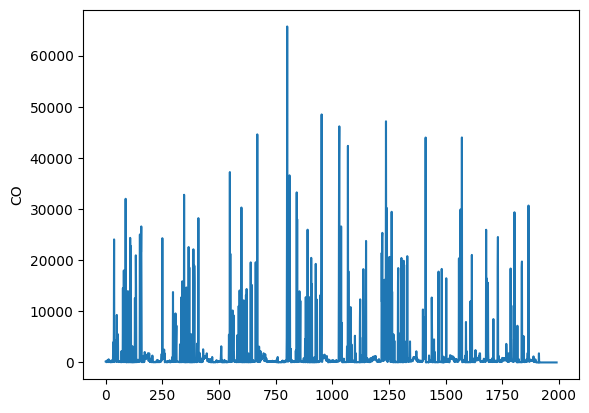

In [41]:
sns.lineplot(data.CO)
plt.show()

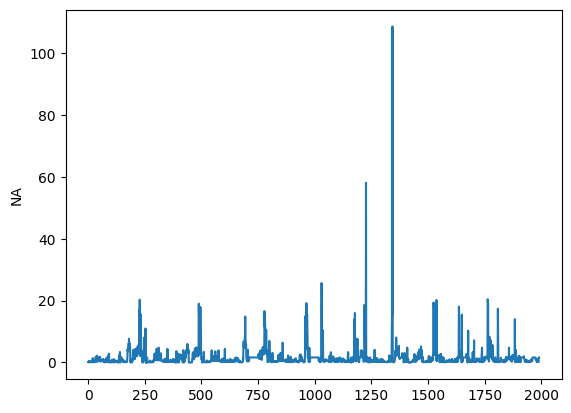

In [42]:
sns.lineplot(data.NA)
plt.show()

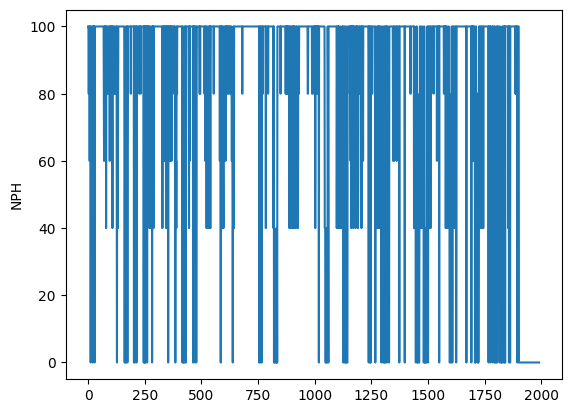

In [43]:
sns.lineplot(data.NPH)
plt.show()

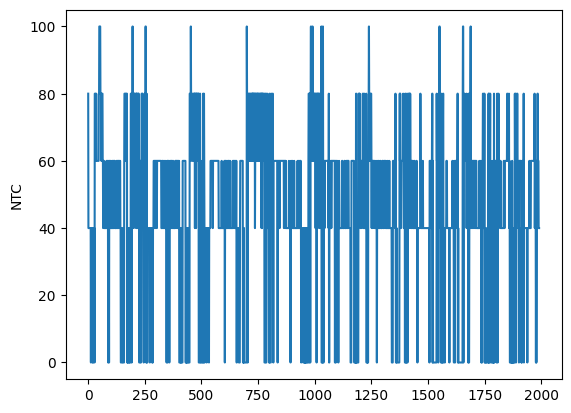

In [44]:
sns.lineplot(data.NTC)
plt.show()

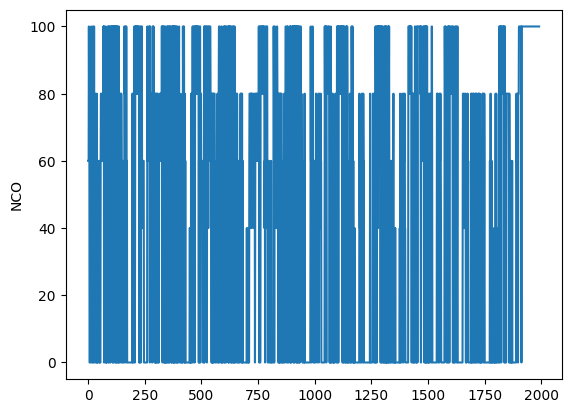

In [45]:
sns.lineplot(data.NCO)
plt.show()

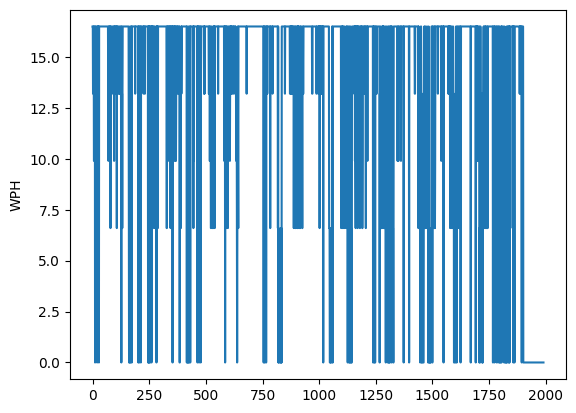

In [46]:
sns.lineplot(data.WPH)
plt.show()

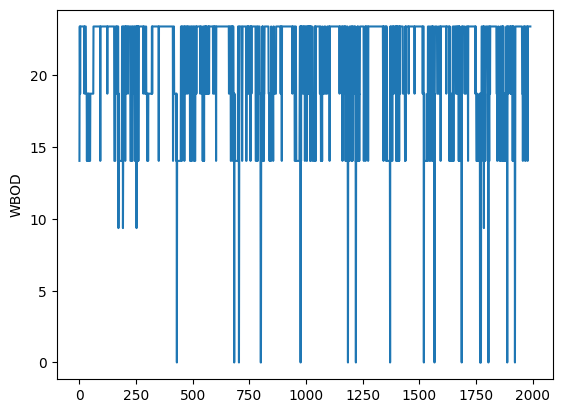

In [47]:
sns.lineplot(data.WBOD)
plt.show()

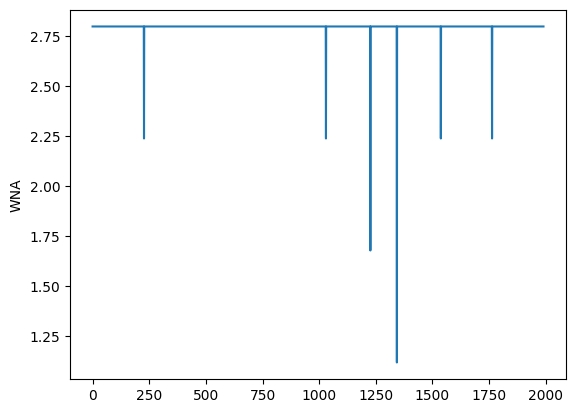

In [48]:
sns.lineplot(data.WNA)
plt.show()

2. Scatter plot

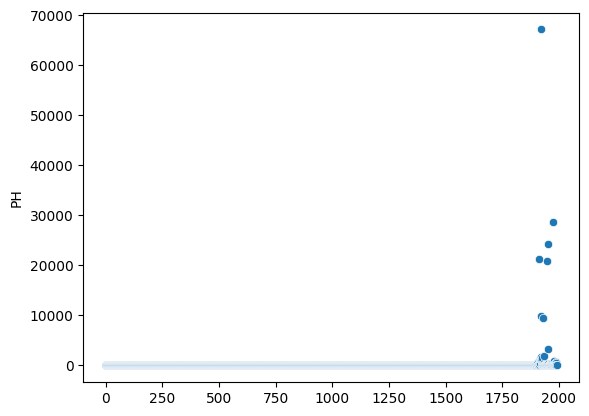

In [49]:
sns.scatterplot(data.PH)
plt.show()

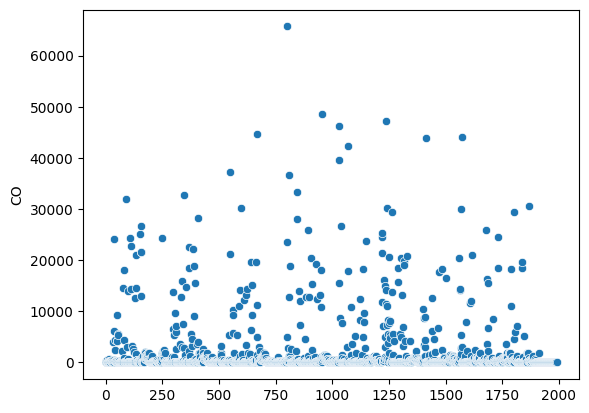

In [50]:
sns.scatterplot(data.CO)
plt.show()

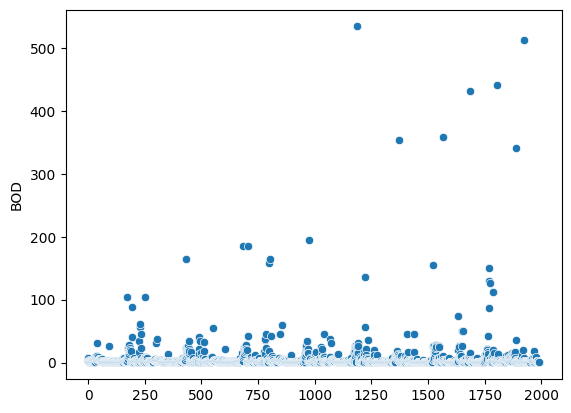

In [51]:
sns.scatterplot(data.BOD)
plt.show()

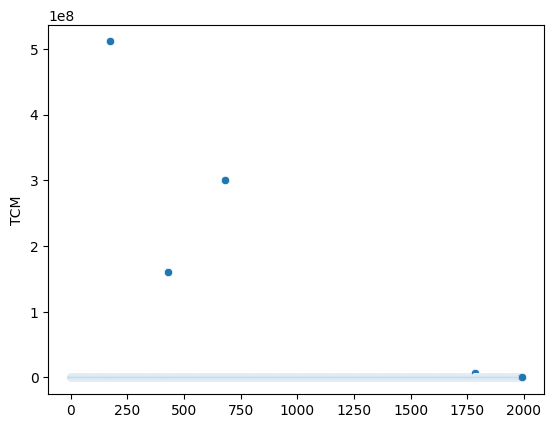

In [52]:
sns.scatterplot(data.TCM)
plt.show()

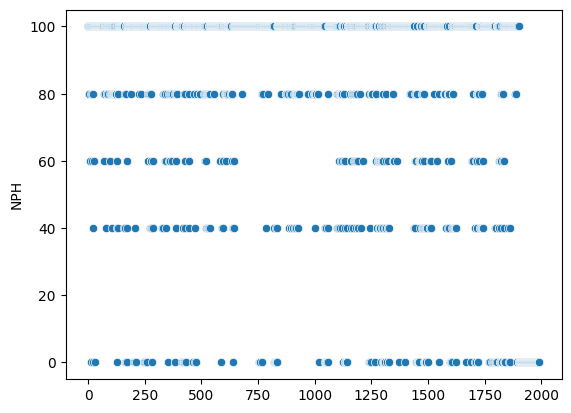

In [53]:
sns.scatterplot(data.NPH)
plt.show()

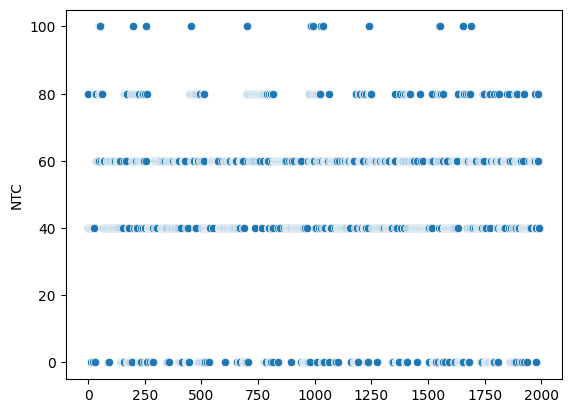

In [54]:
sns.scatterplot(data.NTC)
plt.show()

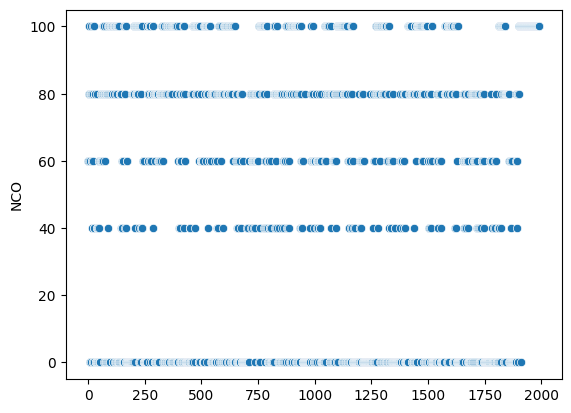

In [55]:
sns.scatterplot(data.NCO)
plt.show()

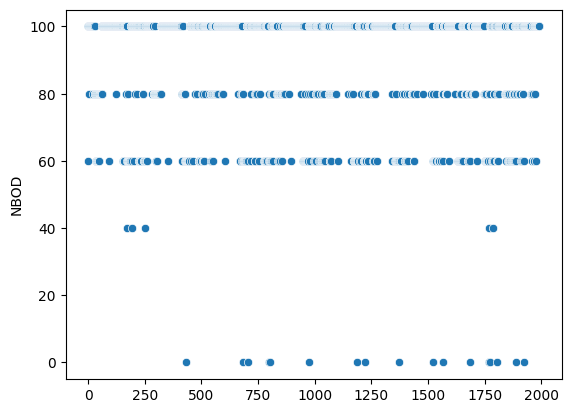

In [56]:
sns.scatterplot(data.NBOD)
plt.show()

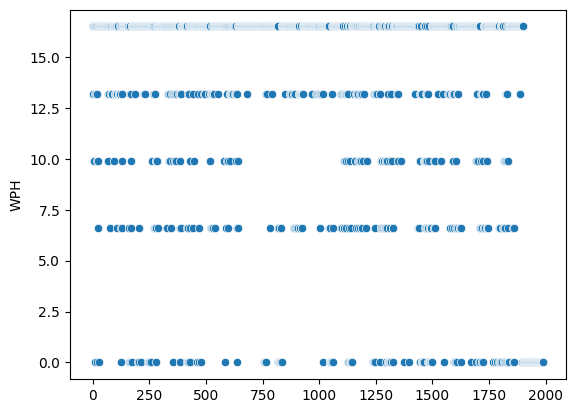

In [57]:
sns.scatterplot(data.WPH)
plt.show()

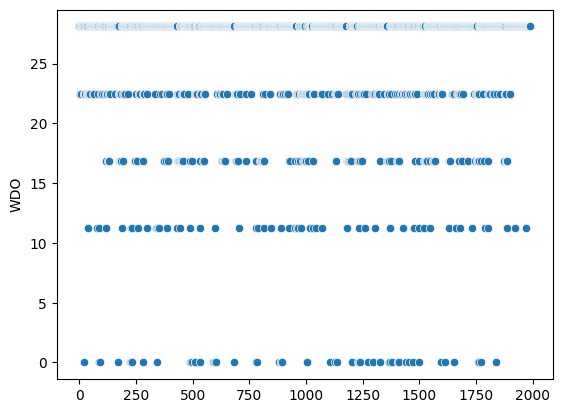

In [58]:
sns.scatterplot(data.WDO)
plt.show()

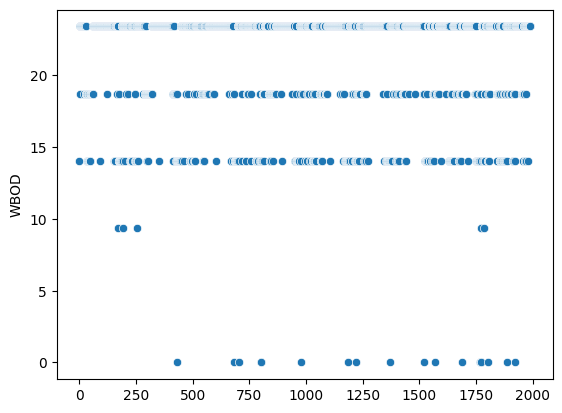

In [59]:
sns.scatterplot(data.WBOD)
plt.show()

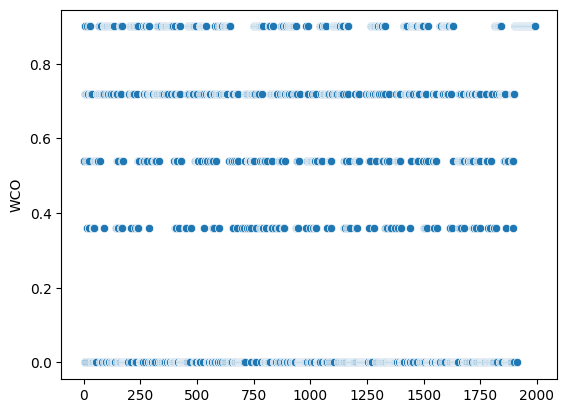

In [60]:
sns.scatterplot(data.WCO)
plt.show()

Multivariate analysis

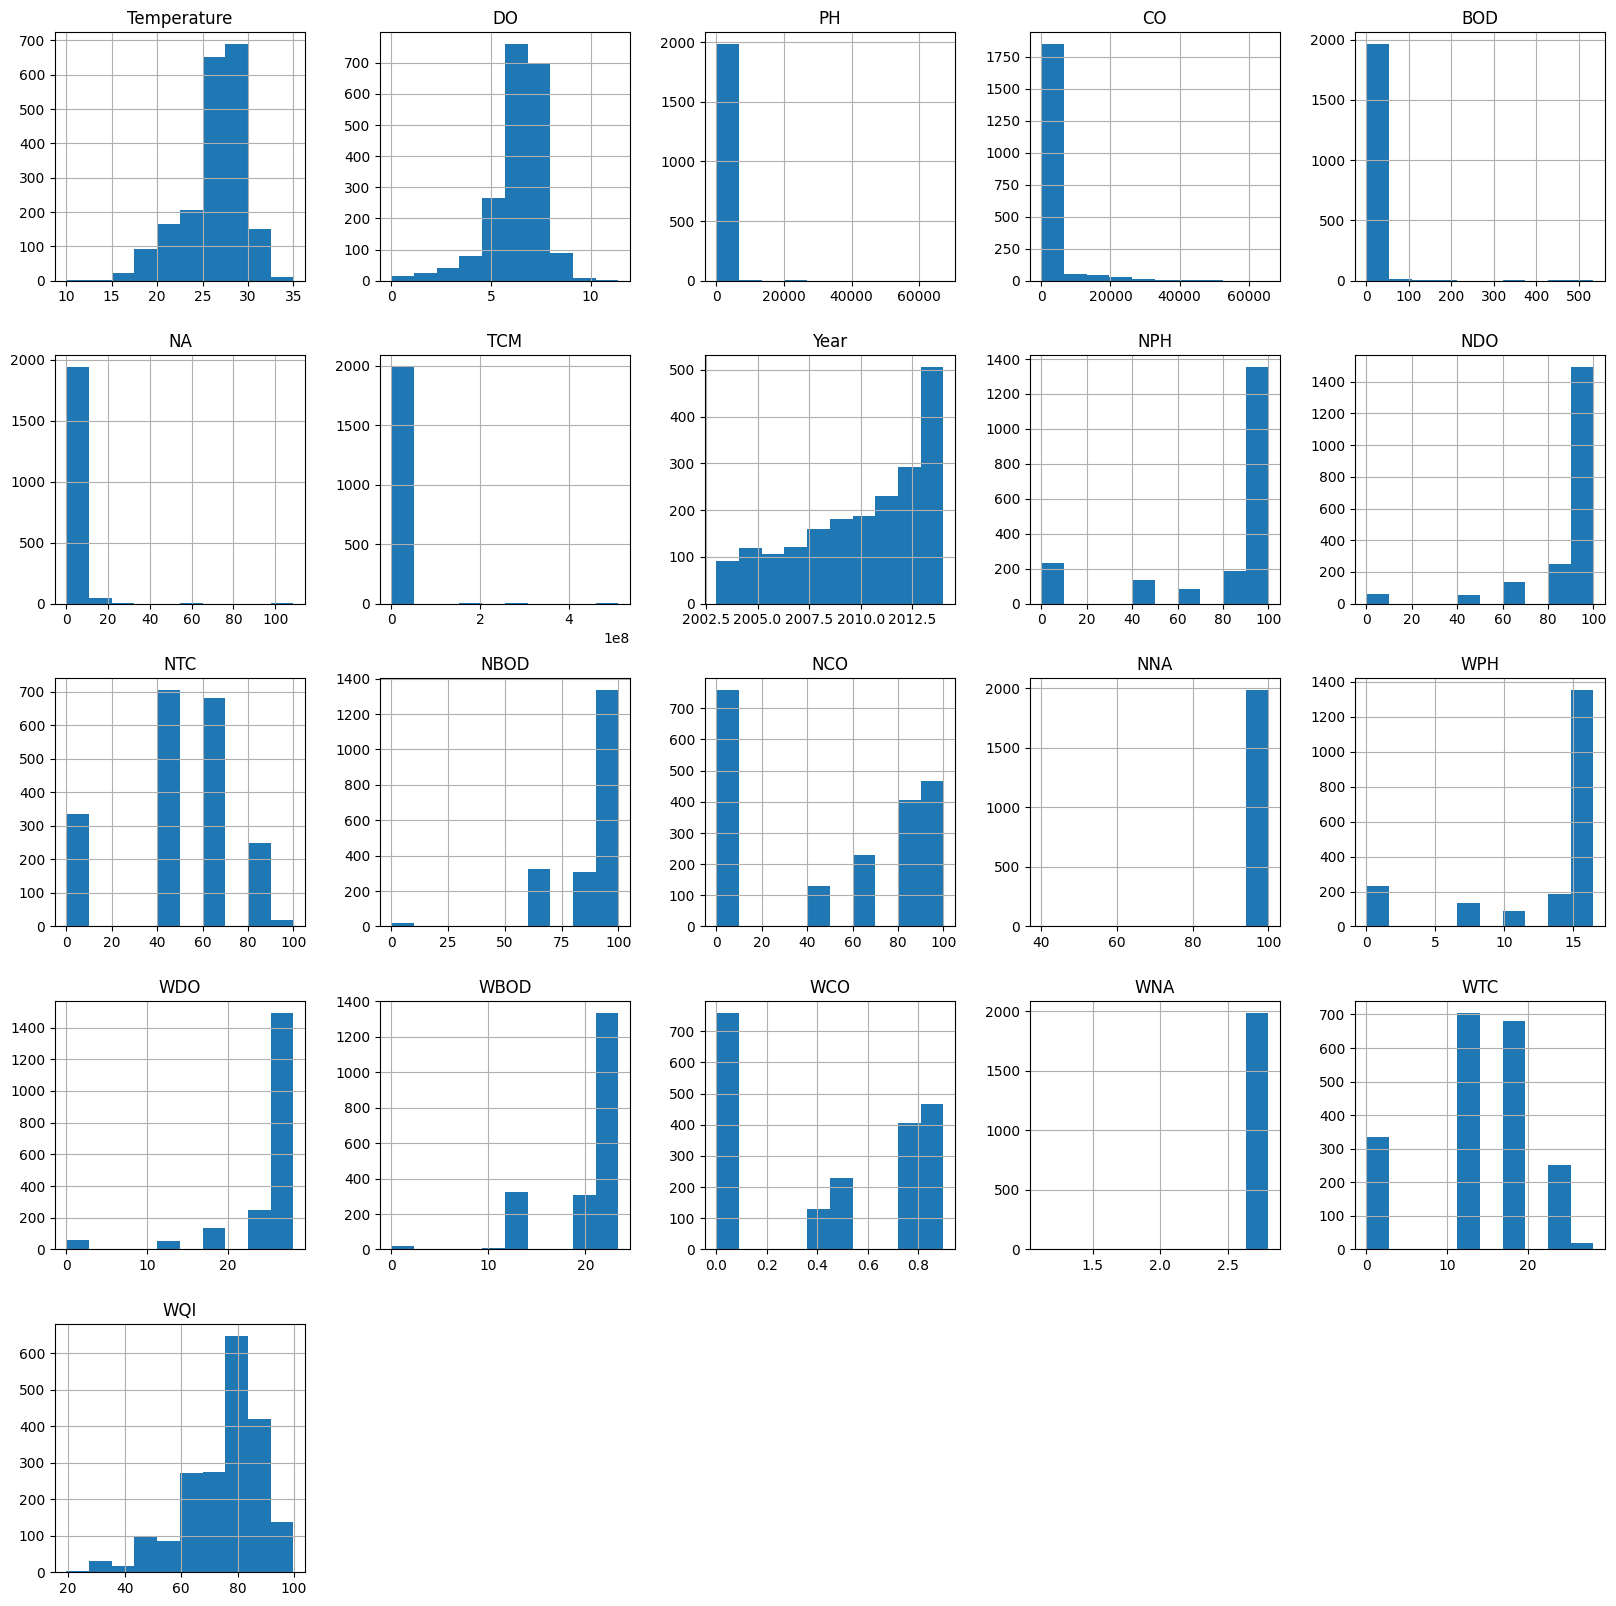

In [61]:
data.hist(figsize=(20,20))
plt.show()

Label Encoding

In [62]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.LC=le.fit_transform(data.LC)
data.ST=le.fit_transform(data.ST)
data.head()

,SC,LC,ST,Temperature,DO,PH,CO,BOD,NA,TCM,...,NBOD,NCO,NNA,WPH,WDO,WBOD,WCO,WNA,WTC,WQI
0,1393,83,21,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,664,51,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,665,51,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,495,51,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,496,51,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14


Finding correlation matrix using Heatmap

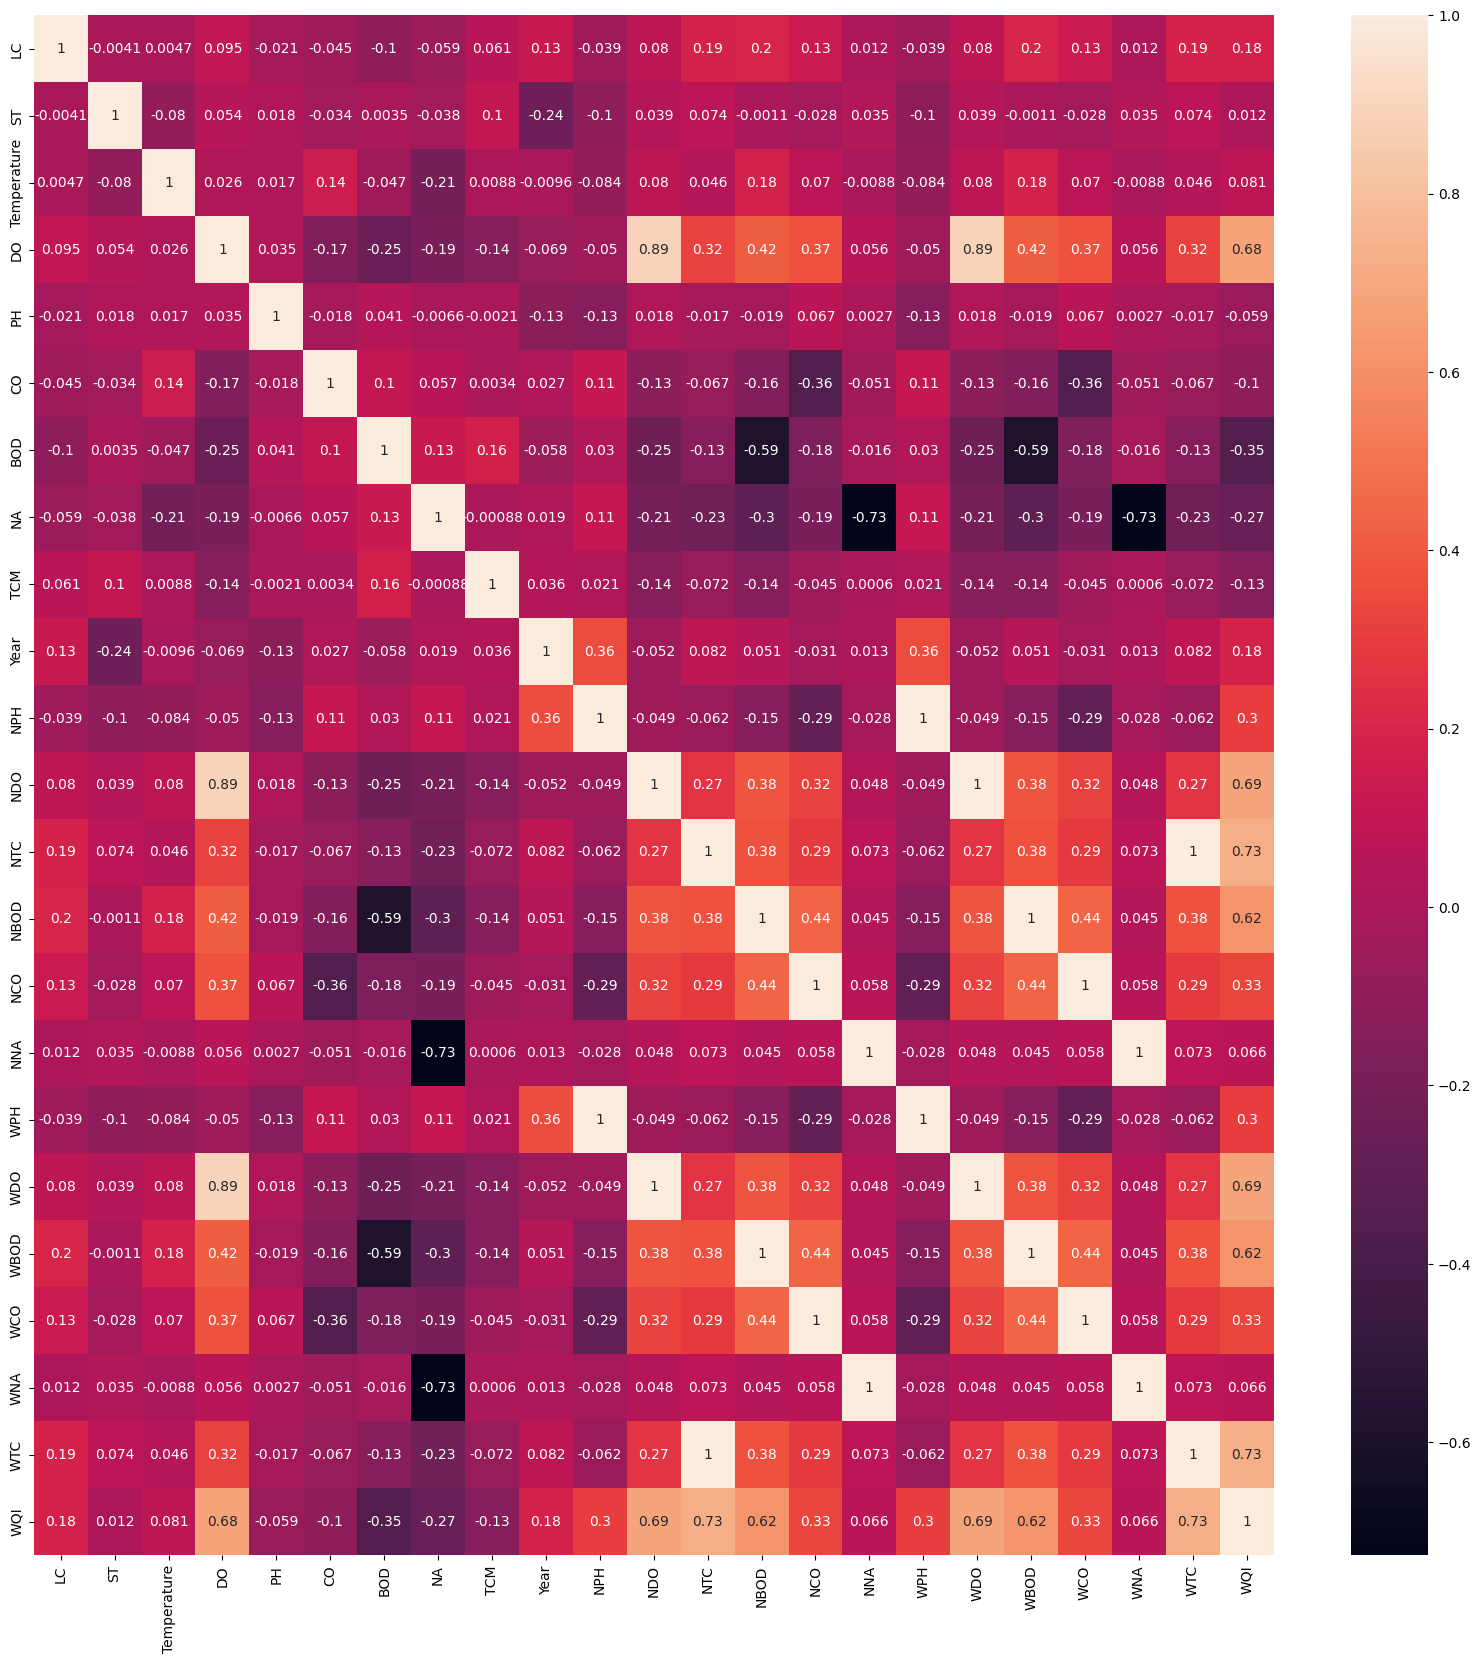

In [63]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [64]:
df=data.drop(['NTC','NPH','NDO','NBOD','NCO','NNA','LC','ST','SC','WPH','WDO','WBOD','WCO','WNA','WTC','Temperature'],axis=1)
df

,DO,PH,CO,BOD,NA,TCM,Year,WQI
0,6.7,7.5,203.0,6.940049,0.100000,27.0,2014,84.46
1,5.7,7.2,189.0,2.000000,0.200000,8391.0,2014,76.96
2,6.3,6.9,179.0,1.700000,0.100000,5330.0,2014,79.28
3,5.8,6.9,64.0,3.800000,0.500000,8443.0,2014,69.34
4,5.8,7.3,83.0,1.900000,0.400000,5500.0,2014,77.14
...,...,...,...,...,...,...,...,...
1986,7.9,738.0,7.2,2.700000,0.518000,202.0,2003,72.06
1987,7.5,585.0,6.3,2.600000,0.155000,315.0,2003,72.06
1988,7.6,98.0,6.2,1.200000,1.623079,570.0,2003,66.44
1989,7.7,91.0,6.5,1.300000,1.623079,562.0,2003,66.44


In [65]:
#Copying DataFrame to CSV file
df.to_csv('df')

In [66]:
df.corr().WQI.sort_values(ascending=False)

WQI     1.000000
DO      0.678756
Year    0.180629
PH     -0.059461
CO     -0.104916
TCM    -0.133946
NA     -0.265051
BOD    -0.349332
Name: WQI, dtype: float64

Splitting Dependent and Independent Columns

In [67]:
data.drop(['LC','SC','ST'],axis =1,inplace=True)

In [68]:
data.head()

,Temperature,DO,PH,CO,BOD,NA,TCM,Year,NPH,NDO,...,NBOD,NCO,NNA,WPH,WDO,WBOD,WCO,WNA,WTC,WQI
0,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,2014,100,100,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,2014,100,80,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,2014,80,100,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,2014,80,80,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,2014,100,80,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14


In [69]:
x=df.iloc[:,0:7].values
x.shape

(1991, 7)

In [70]:
y=df.iloc[:,-1:].values
y.shape

(1991, 1)

In [71]:
print(x)

[[6.70000000e+00 7.50000000e+00 2.03000000e+02 ... 1.00000000e-01
  2.70000000e+01 2.01400000e+03]
 [5.70000000e+00 7.20000000e+00 1.89000000e+02 ... 2.00000000e-01
  8.39100000e+03 2.01400000e+03]
 [6.30000000e+00 6.90000000e+00 1.79000000e+02 ... 1.00000000e-01
  5.33000000e+03 2.01400000e+03]
 ...
 [7.60000000e+00 9.80000000e+01 6.20000000e+00 ... 1.62307871e+00
  5.70000000e+02 2.00300000e+03]
 [7.70000000e+00 9.10000000e+01 6.50000000e+00 ... 1.62307871e+00
  5.62000000e+02 2.00300000e+03]
 [7.60000000e+00 1.10000000e+02 5.70000000e+00 ... 1.62307871e+00
  5.46000000e+02 2.00300000e+03]]


In [72]:
print(y)

[[84.46]
 [76.96]
 [79.28]
 ...
 [66.44]
 [66.44]
 [66.44]]


Splitting  Train and Test Data

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=10)

Feature Scaling

In [74]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

In [75]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

Model Evaluation

In [76]:
from sklearn import metrics
print('Mean Absolute Error (MAE):',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error (MSE):',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error (RMSE) :',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error (MAE): 0.9425563909774494
Mean Squared Error (MSE): 5.63627572932331
Root Mean Squared Error (RMSE) : 2.374084187497004


Cross-Validation

In [77]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print('Cross-validated RMSE:', np.sqrt(-scores.mean()))

Cross-validated RMSE: 2.287296908881305


Hyperparparameter Tuning

In [78]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [10, 50, 100],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# rf_regressor = RandomForestRegressor(random_state=0)
# grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(x_train, y_train)
# best_regressor = grid_search.best_estimator_
# print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Robust Model Evaluaion

In [79]:
from sklearn.metrics import r2_score
print('R-squared:', r2_score(y_test, y_pred))

R-squared: 0.9692766700278257


Model Persistence

In [80]:
import pickle
pickle.dump(regressor,open('wqi.pkl','wb'))
model=pickle.load(open('wqi.pkl','rb'))

In [81]:
regressor.predict([[5.7,7.2,189.0,2.000000,0.200000,8391.0,2014]])

array([76.47])

In [82]:
regressor.predict([[6.7,7.5,203.0,6.940049,0.1,27.0,2014]])

array([85.306])